In [1]:
import urllib.request
import cv2
import os
import math
import matplotlib.pyplot as plt
%matplotlib inline

bunny_image_url = "http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Dataset/bunny.png"
bunny_name = "bunny.png"
urllib.request.urlretrieve(bunny_image_url, bunny_name)
im = cv2.imread(bunny_name)

Original size of bunny's image is: 630 Kilo Bytes


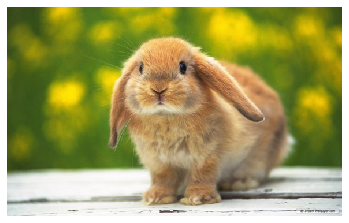

In [6]:
img_corrected = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img_corrected)
print("Original size of bunny's image is: {} Kilo Bytes".format(str(math.ceil((os.stat(bunny_name).st_size)/1000))))

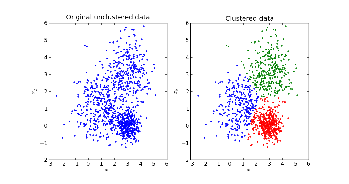

In [5]:
k_means_url = "http://i.stack.imgur.com/cIDB3.png"
k_name = "K_Means_Clustering.png"
urllib.request.urlretrieve(k_means_url, k_name)
k_means_im = cv2.imread(k_name)
k_means_im_corrected = cv2.cvtColor(k_means_im, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(k_means_im_corrected)

In [7]:
# We are using the sklearn python module and are importing the in built KMeans
# function from it
from sklearn.cluster import KMeans
# we import numpy here to transform image dimensions
import numpy as np
# Extracting num_rows and num_cols from bunny's image (stored in im variable)
num_rows = im.shape[0]
num_cols = im.shape[1]
transform_image_for_KMeans = im.reshape(num_rows*num_cols, 3)

In [8]:
# Performing KMeans to compress image, here K = 8 clusters
kmeans = KMeans(n_clusters = 8)
kmeans.fit(transform_image_for_KMeans)

cluster_centroids = np.asarray(kmeans.cluster_centers_, dtype=np.uint8)
# labels represent the label of each pixel and which cluster it belongs to
labels = np.asarray(kmeans.labels_,dtype=np.uint8)
labels = labels.reshape(num_rows, num_cols);

Compressed size of bunny's image is: 48 Kilo Bytes


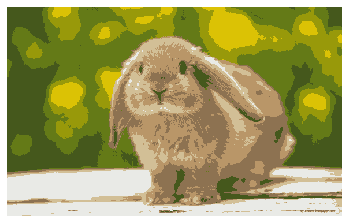

In [10]:
compressed_image = np.ones((num_rows, num_cols, 3), dtype=np.uint8)
for r in range(num_rows):
    for c in range(num_cols):
        compressed_image[r, c, :] = cluster_centroids[labels[r,c], :]
cv2.imwrite("compressed_bunny_image.png", compressed_image)
compressed_bunny_im = cv2.imread("compressed_bunny_image.png")
compressed_bunny_im_corrected = cv2.cvtColor(compressed_bunny_im, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(compressed_bunny_im_corrected)
print("Compressed size of bunny's image is: {} Kilo Bytes".format(str(math.ceil((os.stat('compressed_bunny_image.png').st_size)/1000))))